In [1]:
import os
import numpy as np
import pandas as pd
os.getcwd()
change="C:\\Users\\talib\\OneDrive\\Desktop"
os.chdir(change)
os.getcwd()
dataset=""
for file in os.listdir():
    file_name=file.split('.')
    if len(file_name)>1:
        file1,ext=file_name
        if ext=="csv":
            dataset=file
df=pd.read_csv(dataset)
df.head(1)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...


In [2]:
# A. Pricing and Discount Analysis (P&D)
# Q1. What is the average discounted price and the average actual price for
# all products in the dataset? [Hint: Pandas mean()]
rs=chr(8377)
print("============Average Discounted Price=============")
discount_price=(df["discounted_price"].str.replace(rs,"",regex=False).str.replace(",","",regex=False).str.strip())
discount_price=discount_price.replace("",pd.NA).astype(float)

avg_discounted_price=discount_price.mean()
print(f"Average Discounted Price:{rs}{avg_discounted_price:.3f}")

print("============Average Actual Price=============")
actual_price1=(df["actual_price"].str.replace(rs,"",regex=False).str.replace(",","",regex=False).str.strip())
actual_price1=actual_price1.replace("",pd.NA).astype(float)
avg_actual_price=actual_price1.mean()
print(f"Average Actual Price:{rs}{avg_actual_price:.3f}")


============Average Discounted Price=============
Average Discounted Price:₹3125.311
============Average Actual Price=============
Average Actual Price:₹5444.991


In [3]:
# Q2. What is the standard deviation of the discount percentage? [Hint:
# Pandas/Numpy std()]
discount_per=(df["discount_percentage"].str.replace("%","",regex=False).str.strip())
discount_per=discount_per.replace("",pd.NA).astype(float)
std=discount_per.std()
print(f"Standard Deviation:{std:.3f}")

Standard Deviation:21.636


In [4]:
# Q3. Which product (product name and product id) has the highest discount
# percentage? [Hint: Pandas idxmax()]
data=df
data["discount_per"]=discount_per

data2=data.sort_values(by="discount_per",ascending=False)

data2[["product_id","product_name","discount_per"]].head(1)


,product_id,product_name,discount_per
695,B097C564GC,"rts [2 Pack] Mini USB C Type C Adapter Plug, T...",94.0


In [5]:
# Q4. Calculate the total potential savings (sum of actual price−discounted price)
# across all unique products. [Hint: Pandas arithmetic and sum()]
data3=df.nunique()
data3["discount_price"]=discount_price
data3["actual_price1"]=actual_price1
ac_price=data3["actual_price1"].sum()
dc_price=data3["discount_price"].sum()
potential_savings=ac_price-dc_price
print(ac_price)
print(dc_price)
print(f"Potential Savings:{rs}{potential_savings}")

7976911.28
4578580.43
Potential Savings:₹3398330.8500000006


In [6]:

df["actual_price1"]=actual_price1
df["discount_price1"]=discount_price
df.head(1)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,discount_per,actual_price1,discount_price1
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,64.0,1099.0,399.0


In [7]:
# Q5. What is the average actual price for products that have a discount percentage
# greater than 50%? [Hint: Pandas filtering and mean()]
act_price=df.loc[df["discount_per"]>50.0]
print(f"Average Actual Price :{rs}{act_price["actual_price1"].mean():.3f}")

Average Actual Price :₹3514.524


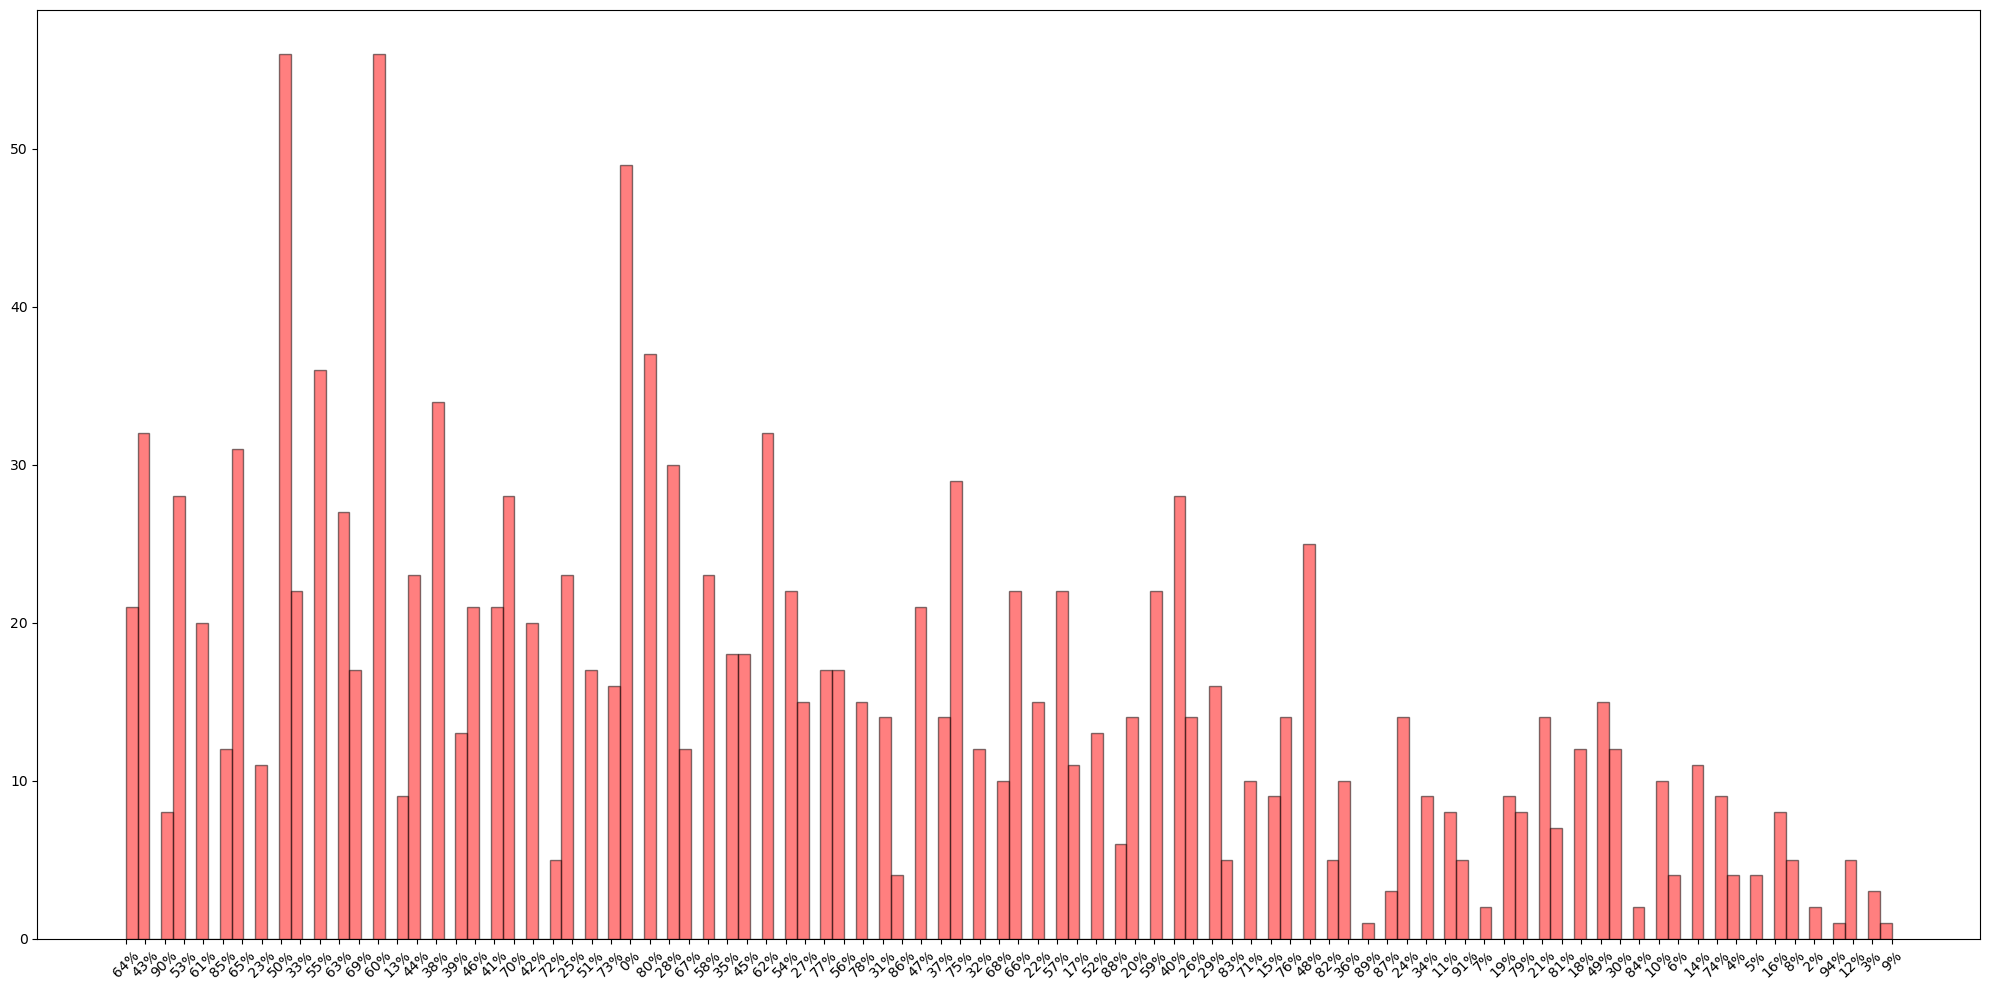

In [8]:
# Q6. Create a histogram to visualize the distribution of discount percentage
# across all products. [Hint: Matplotlib hist()]
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.hist(df["discount_percentage"],bins=150,edgecolor="k",color="red",alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

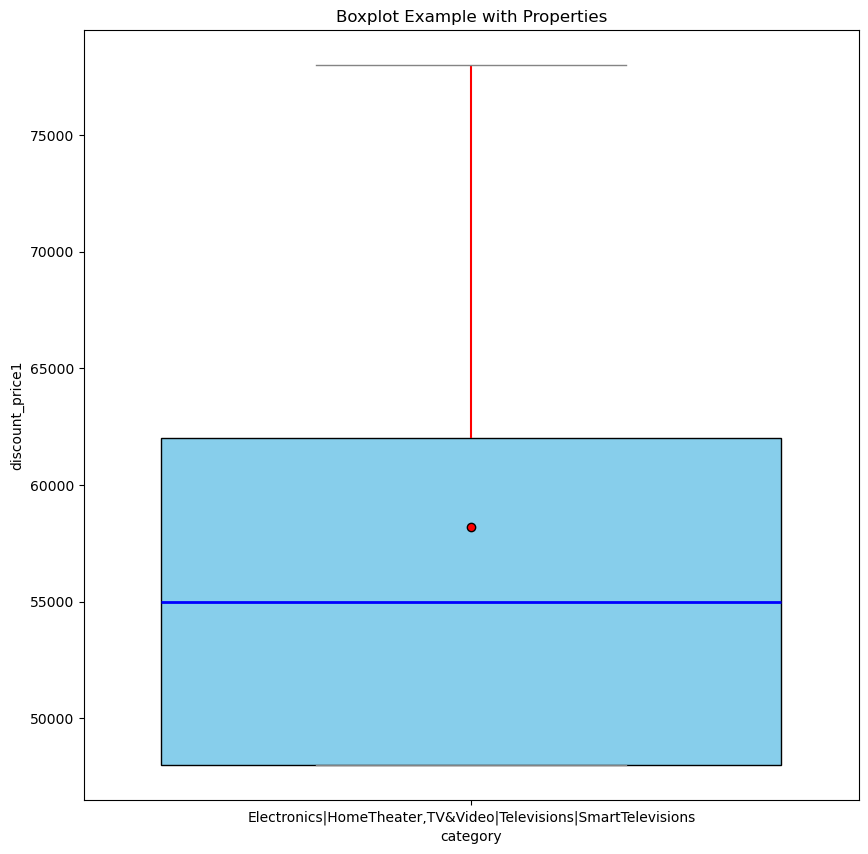

In [9]:
# Q7. Generate box plots to compare the distribution of discounted price across
# the top 5 largest categories. [Hint: Matplotlib boxplot() or Pandas
# plotting with groupby()]
import seaborn as sns
largest=df.sort_values(by="discount_price1",ascending=False)
largest_5=largest.head()
plt.figure(figsize=(10,10))

sns.boxplot(
    x=largest_5["category"], 
    y=largest_5["discount_price1"], 
    data=largest_5,
    hue=largest_5["category"],
    palette="coolwarm",
    order=largest_5["category"],
    dodge=True,
    showcaps=True,        # show top/bottom caps
    boxprops={"facecolor":"skyblue","edgecolor":"black"},
    whiskerprops={"color":"red","linewidth":1.5},
    medianprops={"color":"blue","linewidth":2},
    showmeans=True,       # add mean marker
    meanprops={"marker":"o","markerfacecolor":"red","markeredgecolor":"black"}
)

plt.title("Boxplot Example with Properties")
plt.show()


In [10]:
# Q8. Identify the number of products where the calculated discount (based on
# actual price and discounted price) does not match the listed discount percentage
# (requiring data consistency check).
for i in df.index:
    discount_money=df["actual_price1"].head(i)-(df["actual_price1"].head(i)*df["discount_per"].head(i)/100)
    if discount_money!=df["discount_price1"].head(i):
        print(df["product_name"].head(i))
    else:
        continue

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [11]:
#B. Rating and Review Analysis (R&R)
# Q9 What is the overall average rating of all products, weighted by rating count?
# [Hint: Numpy weighted average calculation.]
df.head(1)
rating_ct=(df["rating_count"].str.replace(",","",regex=False).str.strip())
rating_ct=rating_ct.replace("",pd.NA).astype(float)
df["rating_count1"]=rating_ct

avg_rating=df.groupby("rating")["rating_count1"].mean()
print(avg_rating)

rating
2          2.000000
2.3       13.000000
2.6       24.000000
2.8       98.000000
2.9      159.000000
3        617.000000
3.0      392.000000
3.1     1522.250000
3.2      199.000000
3.3     3198.625000
3.4     3275.400000
3.5     8208.500000
3.6     5246.885714
3.7     5187.619048
3.8    10253.139535
3.9    13447.634146
4       5445.288462
4.0    17429.449612
4.1    29065.188525
4.2    21593.859649
4.3    16870.813043
4.4    28505.406504
4.5    18552.880000
4.6     7024.176471
4.7     3398.000000
4.8    19265.000000
5.0       14.000000
|        992.000000
Name: rating_count1, dtype: float64


In [12]:
# Q10 Which product (product id) has the highest rating count (most reviews/votes)?
# [Hint: Pandas max()]
highest_rating_count=df.sort_values(by="rating_count1",ascending=False)
highest_rating_count[["product_id","product_name","rating_count"]].head()

,product_id,product_name,rating_count
47,B014I8SSD0,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...","4,26,973"
65,B014I8SX4Y,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...","4,26,973"
12,B07KSMBL2H,AmazonBasics Flexible Premium HDMI Cable (Blac...,"4,26,973"
684,B07KSMBL2H,AmazonBasics Flexible Premium HDMI Cable (Blac...,"4,26,972"
400,B07GQD4K6L,boAt Bassheads 100 in Ear Wired Earphones with...,"3,63,713"


In [13]:
# Q11 Calculate the total number of individual ratings/votes (rating count) recorded
# across the entire dataset. [Hint: Pandas sum()]
total_number_rating=df["rating_count1"].sum()
print("Total number of ratings:",total_number_rating)

Total number of ratings: 26766377.0


In [14]:
# Q12 Determine the distribution of rating values (1.0, 2.0, 3.0, 4.0, 5.0) and visualize it using a bar chart. [Hint: Pandas value counts() and Matplotlib
# bar()]
rating_values=df["rating"].value_counts()
rating_values

rating
4.1    244
4.3    230
4.2    228
4.0    129
3.9    123
4.4    123
3.8     86
4.5     75
4       52
3.7     42
3.6     35
3.5     26
4.6     17
3.3     16
3.4     10
4.7      6
3.1      4
3.0      3
4.8      3
5.0      3
2.8      2
3.2      2
2.3      1
|        1
2        1
3        1
2.6      1
2.9      1
Name: count, dtype: int64

In [15]:
# Q13 Find the product with the longest review content and identify the user
# who wrote it (user name). [Hint: Pandas string length calculation
# and idxmax()]
df["review_len"]=df["review_content"].str.len()
longest_review=df["review_len"].idxmax()
user_name=df.loc[longest_review,"user_name"]
user_name


'Neeraj Vishwakarma,⚡ Pushpendra Singh Patel ⚡,Sanjeev Ydv,ESHAN GARG,Arvind,niharika,Parvesh,Amazon Customer'

In [16]:
# Q14 Calculate the correlation coefficient between rating and discount percentage.
# [Hint: Pandas corr()]
rat=(df["rating"].str.replace("|","",regex=False).str.strip())
rat=rat.replace("",0.0).astype(float)
corr=rat.corr(df["discount_per"])
print("Correlation:",corr)

Correlation: -0.13255588435937216


In [20]:
# Q15 Is there a difference in average rating between products with a high rating
# count (e.g., top 10%) and those with a low rating count? [Hint: Pandas
# quantile() and mean()]
top_threshold=df["rating_count1"].quantile(0.9)
bottom_threshold=df["rating_count1"].quantile(0.1)

top_products=df[df["rating_count1"]>=top_threshold]
bottom_products=df[df["rating_count1"]<=bottom_threshold]

top_avg_rating=top_products["rating_count1"].mean()
bottom_avg_rating=bottom_products["rating_count1"].mean()

print(f"Top Average Rating:{top_avg_rating:.3f}")
print(f"Bottom Average Rating:{bottom_avg_rating:.3f}")

Top Average Rating:110598.170
Bottom Average Rating:110.361


In [31]:
# C. Category and Product Analysis (C&P)
# Q16 Which category has the highest number of unique products? [Hint: Pandas
# value counts() and nunique()]
unique_prod=df["category"].value_counts().unique().argmax()
df.loc[unique_prod,"category"]

'Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables'

In [43]:
# Q17 What is the average discounted price for each category? [Hint: Pandas
# groupby() and mean()]
avg_dis_price_cat=df.groupby("category")["discount_price1"].mean()
avg_dis_price_cat.head(2)

category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers     2339.0
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters     221.5
Name: discount_price1, dtype: float64

In [46]:
# Q18 Identify the top 10 most frequently occurring product name and their respective counts. [Hint: Pandas value counts() with head()]
top10=df.groupby("product_name")["product_id"].value_counts().sort_values(ascending=False)
top10.head(10).reset_index()

,product_name,product_id,count
0,Portronics Konnect L POR-1081 Fast Charging 3A...,B08CF3D7QR,3
1,MI Usb Type-C Cable Smartphone (Black),B08DDRGWTJ,3
2,pTron Solero TB301 3A Type-C Data and Fast Cha...,B08Y1TFSP6,3
3,Duracell USB C To Lightning Apple Certified (M...,B09W5XR9RT,3
4,Duracell USB Lightning Apple Certified (Mfi) B...,B09C6HXFC1,3
5,AmazonBasics New Release Nylon USB-A to Lightn...,B082T6V3DT,3
6,Amazonbasics Nylon Braided Usb-C To Lightning ...,B07XLCFSSN,3
7,Ambrane 60W / 3A Fast Charging Output Cable wi...,B09YLXYP7Y,3
8,MI Braided USB Type-C Cable for Charging Adapt...,B083342NKJ,3
9,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,B098NS6PVG,3


C:\Users\talib\AppData\Local\Temp\ipykernel_13764\3953578661.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="category",y="rating_count1",data=rating_count10,palette="viridis")


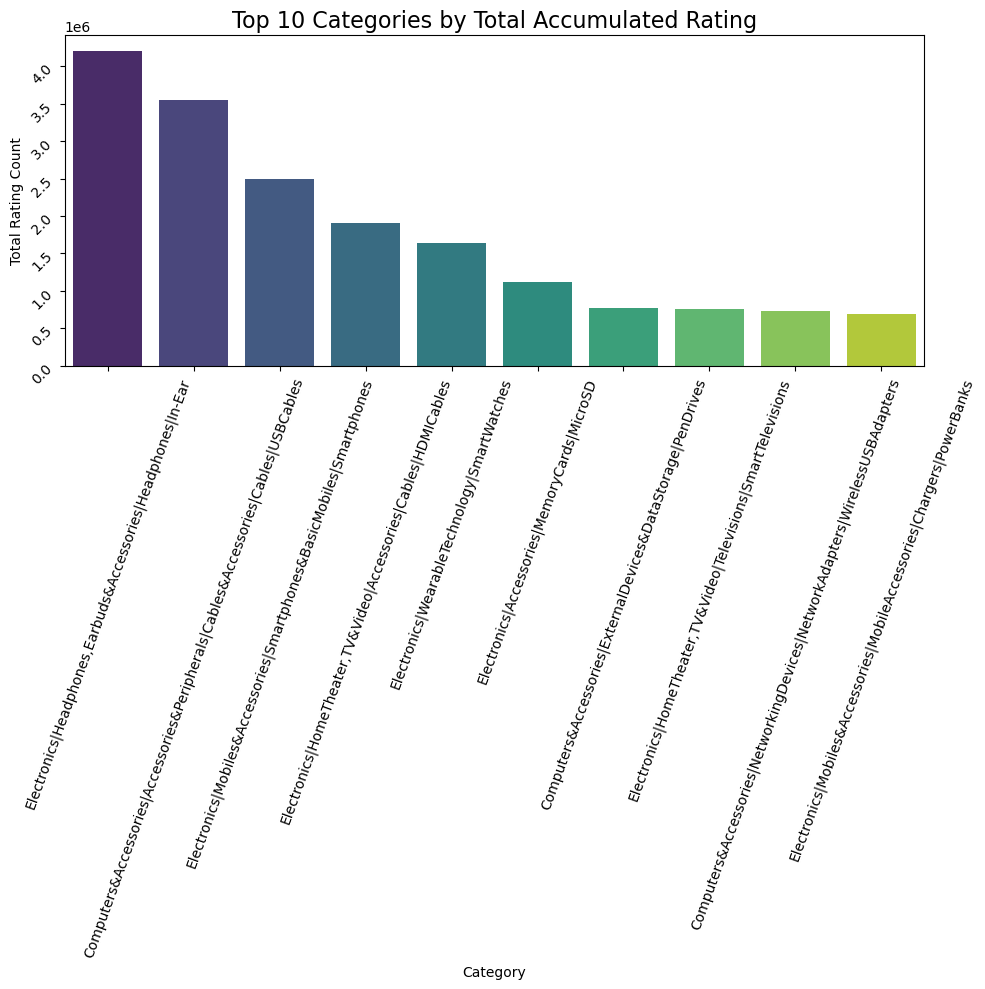

In [63]:
# Q19 Plot a bar chart showing the total accumulated rating count for the top 10
# categories. [Hint: Pandas groupby() and Matplotlib bar()]
rating_c=df.groupby("category")["rating_count1"].sum().reset_index()
rating_count10=rating_c.sort_values(by="rating_count1",ascending=False).head(10)
plt.figure(figsize=(10,10))
sns.barplot(x="category",y="rating_count1",data=rating_count10,palette="viridis")
plt.title('Top 10 Categories by Total Accumulated Rating', fontsize=16)
plt.xlabel("Category")
plt.ylabel("Total Rating Count")
plt.yticks(rotation=45)
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

In [17]:
df.head(1)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,...,review_id,review_title,review_content,img_link,product_link,discount_per,actual_price1,discount_price1,rating_count1,review_len
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",...,"R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,64.0,1099.0,399.0,24269.0,483


In [70]:
# Q20 Calculate the coefficient of variation (Standard Deviation/mean)for the discounted price
# within the top 3 largest categories to measure price volatility. [Hint: Pandas
# groupby() and Numpy division]

cat=df.sort_values(by="discount_price1",ascending=False)
top_3=cat.head(3)
mean=top_3["discount_price1"].mean()
std=top_3["discount_price1"].std()

variation=std/mean

print(f"Co-efficient of Variation for discounted price:{variation:.3f}")

Co-efficient of Variation for discounted price:0.181


In [75]:
# Q21 Which categories have an average rating below 3.5? [Hint: Pandas groupby()
# and filtering.]
rate=(df["rating"].str.replace("|","",regex=False).str.strip())
rate=rate.replace("",0.0).astype(float)
df["rating1"]=rate
avg_rating=df.loc[df["rating1"]<3.5]
avg_rating[["category"]].head(5)

,category
45,Computers&Accessories|Accessories&Peripherals|...
82,"Electronics|HomeTheater,TV&Video|Televisions|S..."
142,"Electronics|HomeTheater,TV&Video|Accessories|R..."
154,Computers&Accessories|NetworkingDevices|Networ...
179,"Electronics|HomeTheater,TV&Video|Accessories|R..."


In [77]:
# Q22 Extract the length of the about product description for each product and
# find the average description length per category. [Hint: Pandas string
# functions and groupby()]
df["about_des_len"]=df["about_product"].str.len()
avg_des_len_cat=df.groupby("category")["about_des_len"].mean()
avg_des_len_cat.head(3)

category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers             1965.0
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters            1768.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets     322.0
Name: about_des_len, dtype: float64

In [ ]:
# Q23 Create a stacked bar chart showing the percentage of products in each category that are rated 4.0 or higher versus those rated 3.0 or lower.


In [86]:
# D. User and Distribution Analysis (U&D)
# Q24 Find the top 10 users (user name) who have written the most reviews and
# display their review count. [Hint: Pandas value counts()]
review_user=df.groupby("user_name")["review_content"].value_counts().sort_values(ascending=False)
review_user.head(10).reset_index()

,user_name,review_content,count
0,"Satheesh Kadiam,Pritom Chakraborty,Vishwa,Simr...","I am not big on camera usage, personally. I wa...",8
1,"$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...",Worked on iPhone 7 and didn’t work on iPhone X...,7
2,"ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...",I ordered this cable to connect my phone to An...,7
3,"Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","Good product,long wire,Charges good,Nice,I bou...",7
4,"siddharth patnaik,Dr Sunilkumar H,Krishna,K. S...",I purchased the 6/128gb variant.To sum it up ...,6
5,"Prashant,Sumesh Sundararajan,Vijay Baitha,S.k ...",128GB SD Card is showing 134GBDon't buy this p...,6
6,"venkatesh kg,Raghuram,YOGESH,Manan Parmar,Niku...","I liked it, worth the money, light weight and ...",5
7,"AV,Mathan kumar,Amol Manjrekar,Suraj_nirmalkar...",[Update: Sept 29] boAt seems to have heard the...,5
8,"Ayush,ROHIT A.,Kedar,Haran,Santosh Ghante,KRIS...",About the TV - Wonderful----------------------...,5
9,"Actual user,Shanti lal Gurjar,Gowthami,Amrut K...","Everything is fine but it is bulky and hard, i...",5


In [95]:
# Q25 How many unique users have reviewed products in the ”Electronics” category? [Hint: Pandas filtering and nunique()]
electronic_user=df[df["category"].apply(lambda x:  "Electronics" in x)]
unique_e_user=electronic_user["user_id"].nunique()
print(f"Unique Users :{unique_e_user}")
        

Unique Users :390


AttributeError: This method only works with the ScalarFormatter

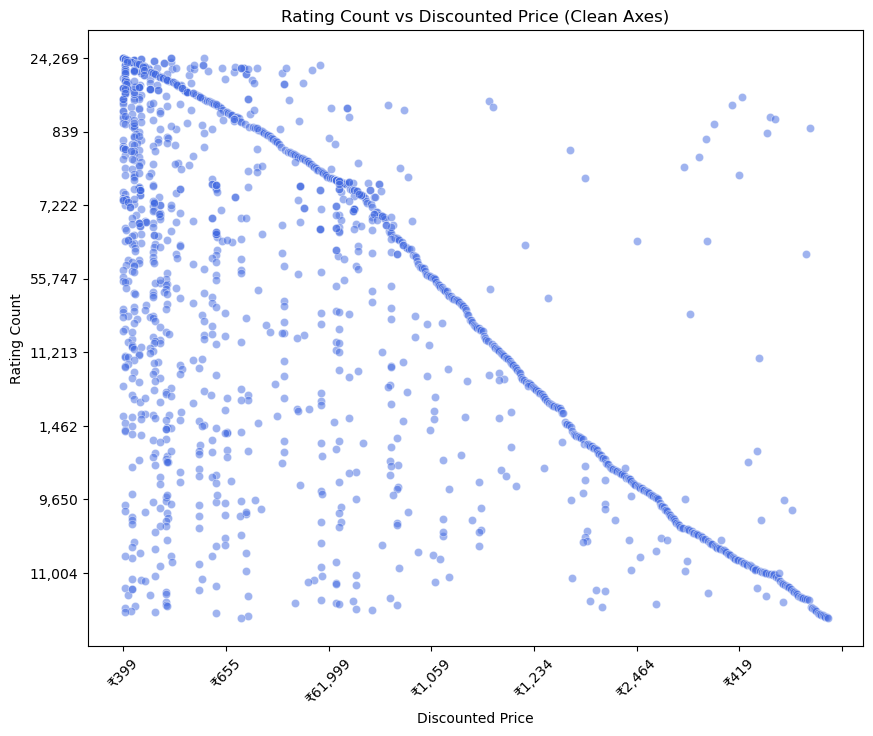

In [104]:
# Q26 Create a scatter plot of rating count versus discounted price to visualize
# if expensive or cheap products attract more attention. [Hint: Matplotlib
# scatter()]
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

plt.figure(figsize=(10,8))
sns.scatterplot(
    x=df["discounted_price"],
    y=df["rating_count"],
    alpha=0.5,
    s=35,
    color="royalblue"
)

plt.title("Rating Count vs Discounted Price ")
plt.xlabel("Discounted Price")
plt.ylabel("Rating Count")

# Clean axis labels
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(10))
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(10))
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.tight_layout()
plt.show()


In [105]:
# Q27 Calculate the skewness and kurtosis of the rating count distribution to
# understand its shape. [Hint: Pandas/Numpy statistical methods]
skewness=df["rating_count1"].skew()
kurtosis=df["rating_count1"].kurt()
print("skewness:",skewness)
print("kurtosis:",kurtosis)

skewness: 5.673784182331723
kurtosis: 40.35187644761081


In [108]:
# Q28 Group products into three equal price bins (low, medium, high) based on
# discounted price and calculate the average rating for each bin. [Hint:
# Pandas qcut() or cut() and groupby()]

df["eq_price_bins"]=pd.qcut(df["discount_price1"],q=3,labels=["Low","Medium","High"])
avg_rating_bin=df.groupby("eq_price_bins")["rating1"].mean()
avg_rating_bin

C:\Users\talib\AppData\Local\Temp\ipykernel_13764\2177935038.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rating_bin=df.groupby("eq_price_bins")["rating1"].mean()


eq_price_bins
Low       4.071142
Medium    4.092540
High      4.119149
Name: rating1, dtype: float64

In [111]:
# Q29 Calculate the correlation matrix between all relevant numerical columns
# (discounted price, actual price, discount percentage, rating, rating count).
# [Hint: Pandas corr()]
columns=["discount_price1","actual_price1","discount_per","rating1","rating_count1"]
corr=df[columns].corr()
print("Correlation:",corr)

Correlation:                  discount_price1  actual_price1  discount_per   rating1  \
discount_price1         1.000000       0.961915     -0.242412  0.114298   
actual_price1           0.961915       1.000000     -0.118098  0.116629   
discount_per           -0.242412      -0.118098      1.000000 -0.132556   
rating1                 0.114298       0.116629     -0.132556  1.000000   
rating_count1          -0.027261      -0.036137      0.011691  0.099549   

                 rating_count1  
discount_price1      -0.027261  
actual_price1        -0.036137  
discount_per          0.011691  
rating1               0.099549  
rating_count1         1.000000  


In [122]:
# Q30 Identify the percentage of products that have both a high discount (e.g.,
# > 50%) AND a high rating (e.g., > 4.0). [Hint: Pandas filtering and
# counting.]
count=df.loc[(df["discount_per"]>50.0) & (df["rating1"]>4.0)].nunique()
percentage_of_product=(348/1464)*100
percentage_of_product

23.770491803278688

In [120]:
df.tail(1)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,...,img_link,product_link,discount_per,actual_price1,discount_price1,rating_count1,review_len,rating1,about_des_len,eq_price_bins
1464,B01486F4G6,Borosil Jumbo 1000-Watt Grill Sandwich Maker (...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,863","₹3,690",22%,4.3,"6,987","Brand-Borosil, Specification â€“ 23V ~ 5Hz;1 W...","AFGW5PT3R6ZAVQR4Y5MWVAKBZAYA,AG7QNJ2SCS5VS5VYY...",...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Borosil-Jumbo-1000-Watt-...,22.0,3690.0,2863.0,6987.0,1457,4.3,391,High
